In [2]:
import sys
sys.path.insert(0, '../')
import analysis_tools.data_loader as dl
dir = '/Users/julian/temp/vessels_tests'
clinical_inputs, ct_inputs, ct_lesion_GT, mri_inputs, mri_lesion_GT, brain_masks, ids, params = dl.load_structured_data(dir, 'data_set.npz')


Loading a total of 113 subjects.
Sequences used: {'ct_sequences': ['wmask_filtered_extracted_betted_Angio'], 'ct_label_sequences': ['wcoreg_VOI'], 'mri_sequences': [], 'mri_label_sequences': []}
0 subjects had been excluded.


In [11]:
# sys.path.insert(0, '/Users/julian/stroke_research/brain_and_donuts/giotto-learn')
import numpy as np
import giotto.homology as hl
from plotting import plot_diagram, plot_betti_curves


In [7]:
test = np.squeeze(ct_inputs[0])
inp = np.asarray([np.asarray(np.where(test == 1)).T])


In [8]:
homologyDimensions = (0, 1 ,2)
persistenceDiagram = hl.VietorisRipsPersistence(metric='euclidean', max_edge_length=10, 
                                                homology_dimensions=homologyDimensions, 
                                                n_jobs=-1)
persistenceDiagram.fit(inp)

# List of all the time-pordered persistent diagrams obtained from the list of correlation matrices
Diagrams = persistenceDiagram.transform(inp)
Diagrams.shape


(1, 13318, 3)

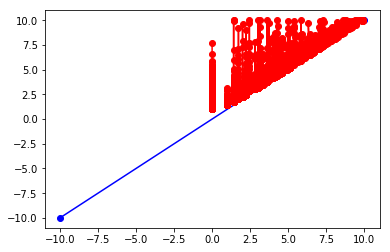

In [34]:
plt_diagram(Diagrams[0])




[2211 2211 2211 2211 2211  240  240  240  240  248  248  276  276  276
  278  278  207  207  207  207  207  228  239  239  227  227  209  209
  204  219  219  199  199  195  195  210  204  205  205  214  215  207
  207  207  210  210  187  181  181  173  172  172  171  174  173  172
  165  164  164  160  156  146  136  125  122  122  120  119  114  114
  102  102   94   83   76   74   67   67   65   63   59   56   53   48
   45   42   42   42   41   39   33   32   27   25   27   27   19   19
   15    0]
[0.         0.07758733 0.15517466 0.23276199 0.31034932 0.38793665
 0.46552398 0.54311131 0.62069864 0.69828597 0.7758733  0.85346063
 0.93104796 1.00863529 1.08622262 1.16380995 1.24139728 1.31898461
 1.39657194 1.47415927 1.5517466  1.62933393 1.70692126 1.78450859
 1.86209592 1.93968325 2.01727058 2.09485791 2.17244524 2.25003257
 2.3276199  2.40520723 2.48279456 2.56038189 2.63796922 2.71555655
 2.79314388 2.87073121 2.94831854 3.02590587 3.1034932  3.18108053
 3.25866786 3.33625519

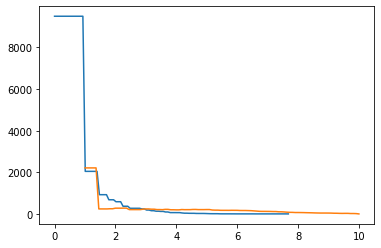

In [28]:
from giotto.diagrams import BettiCurve
betti = BettiCurve(n_values=100)
Xbet = betti.fit_transform(Diagrams)
print(Xbet[0,1,:])
print(betti.samplings_[0])
import matplotlib.pyplot as plt
# plot_betti_curves(Xbet, homology_dimensions=None, samplings=betti.samplings_)
dim = 0
plt.plot(betti.samplings_[dim], Xbet[0, dim, :])
dim = 1
plt.plot(betti.samplings_[dim], Xbet[0, dim, :])


In [16]:
from giotto.meta_transformers import EntropyGenerator as eg
homologyDimensions = (0, 1 ,2)
ent = eg(metric='euclidean', max_edge_length=10, 
            homology_dimensions=homologyDimensions, 
            n_jobs=-1)
ent


EntropyGenerator(filter_epsilon=0.0, homology_dimensions=(0, 1, 2),
                 max_edge_length=10, metric='euclidean', n_jobs=-1,
                 scaler_function=<function amax at 0x10c3e17b8>,
                 scaler_metric='bottleneck', scaler_metric_params=None)

In [8]:
import time
t0 = time.time()
inp_entropy = ent.fit_transform(inp)
t1 = time.time()
print(inp_entropy)
print(t1-t0)

[[9.09230131 7.79440413 5.09142905]]
213.73709416389465


In [22]:
inp_entropy[0][1]


7.794404131281391